Lets Understand some of the most Interesting Patterns of Funding and Startups.
1) How Does the Funding Ecosystem changes with respect to Time?
2) What is the General Amount that Startups get in India?
3) Which Kind of Industries are more preferred for Startups?
4) Does Location also play a role, In determining the Growth of a Startup?
5) Who plays the main role in Indian Startups Ecosystem?
6) What are the different Types of Funding for Startups?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16,7) 

In [2]:
data = pd.read_csv('Finance Data//startup_funding.csv') 

In [3]:
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
data.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
# lets clean the strings
def clean_strings(x):
    return str(x).replace('\\xc2\\xa0', '').replace('\\\\xc2\\\\xa0', '')

for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
            data[col] = data[col].apply(lambda x: clean_strings(x))

data.head() 

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [6]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'Remarks'],
      dtype='object')

In [7]:
print('size of data: ', data.shape)

size of data:  (3044, 10)


In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
# lets calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending = False)

# lets calculate the percentage of missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

# lets check the head of the data
missing_data

,Total,Percent %
Remarks,0,0.0
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0
SNo,0,0.0


In [10]:
data['Remarks'].value_counts()

nan                                 2625
Series A                             177
Series B                              64
Pre-Series A                          37
Series C                              28
                                    ... 
Pre-Series A Bridge                    1
Series F ( More Details Here)          1
Late Stage, 10th Round More here       1
Funding happened in Sept 2015          1
Bridge funding                         1
Name: Remarks, Length: 70, dtype: int64

In [11]:
data.drop(['Remarks'], axis=1, inplace=True)
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD'],
      dtype='object')

In [12]:
# lets convert the amount column into numerical, so that we can analyze the values inside it
# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(',', '').replace('+', '')
    x = str(x).lower().replace('undisclosed', '')
    x = str(x).lower().replace('n/a','')  
    if x == '':
        x = '-999' 
    return x

In [13]:
data['AmountInUSD'] = data['AmountInUSD'].apply(lambda x: float(clean_amount(x))) 

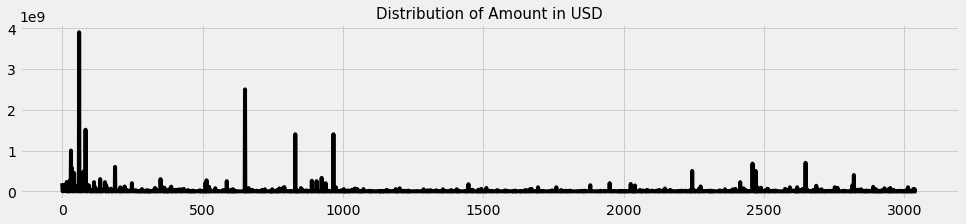

In [14]:
plt.rcParams['figure.figsize'] = (15,3)
data['AmountInUSD'].plot(kind='line', color='black')
plt.title('Distribution of Amount in USD', fontsize=15)
plt.show()

In [15]:
# cleaning the dates 
data['Date'][data['Date'] == '12/05.2015'] = '12/05/2015'
data['Date'][data['Date'] == '13/04.2015'] = '13/04/2015'
data['Date'][data['Date'] == '15/01.2015'] = '15/01/2015'
data['Date'][data['Date'] == '22/01//2015'] = '22/01/2015'
data['Date'][data['Date'] == '05/072018'] = '05/07/2018'
data['Date'][data['Date'] == '01/07/015'] = '01/07/2015'
data['Date'][data['Date'] == '\\\\xc2\\\\xa010/7/2015'] = '10/7/2015'

In [18]:
# converting date columm in Datetime object
data['yearmonth'] = pd.to_datetime(data['Date'], 
                    format='%d/%m/%Y').dt.year*100 + pd.to_datetime(data['Date'], format='%d/%m/%Y').dt.month 

temp = data['yearmonth'].value_counts().sort_values(ascending=False).head(10)
print("Number of funding per month in descending order (Top 10)\n", temp) 
year_month =data['yearmonth'].value_counts() 

Number of funding per month in descending order (Top 10)
 201601    104
201602    100
201508     98
201507     98
201606     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


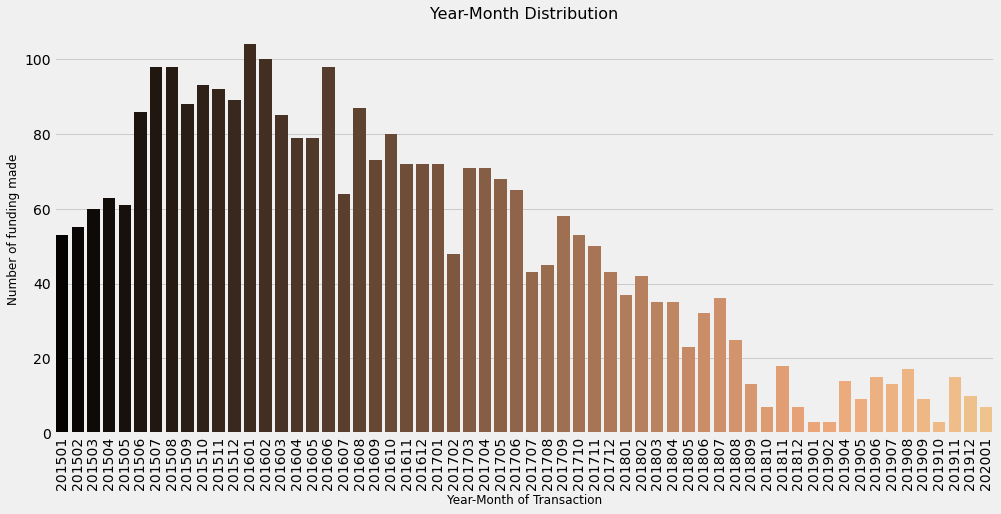

In [19]:
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(year_month.index, year_month.values, palette='copper')
plt.xticks(rotation=90)
plt.xlabel('Year-Month of Transaction', fontsize=12)
plt.ylabel('Number of funding made', fontsize=12)
plt.title('Year-Month Distribution', fontsize=16)
plt.show()

In [20]:
# lets check the maximum funding of the startup 
print("Maximum funding of the startup is: ", data['AmountInUSD'].max())

Maximum funding of the startup is:  3900000000.0


In [23]:
# lets check startup with 50 Cr funding
@interact
def check(column = 'AmountInUSD', x=500000000):
    return data[data[column]>x].sort_values(by='AmountInUSD', ascending=False) 


interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

In [25]:
# lets check out different ventures of paytm
data[data['StartupName'] == 'Paytm'] 

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [26]:
# lets check out different ventures of flipkart
data[data['StartupName'] == 'Flipkart']

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,201706
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,201702
2689,2690,04/06/2015,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,201506


In [28]:
# lets check minimum funding in a startup
print('Minimum funding in a startup is :', data['AmountInUSD'].min())

Minimum funding in a startup is : -999.0


In [36]:
# lets check startup with least funding
data[['AmountInUSD', 'StartupName']].sort_values(by='AmountInUSD', ascending=True).head()

,AmountInUSD,StartupName
2125,-999.0,Splitkart
1464,-999.0,TAC Security
708,-999.0,FableStreet
709,-999.0,Monsoon Fintech
710,-999.0,MonkeyBox


In [37]:
data[data['AmountInUSD'] == -999].shape

(971, 10)

In [38]:
# Average funding per startup
print('On average indian startup got funding of: ', data['AmountInUSD'].mean())

On average indian startup got funding of:  13270058.261169514


Total startup funded: 458
Swiggy           8
Ola Cabs         8
Paytm            7
Meesho           6
Nykaa            6
Medinfi          6
NoBroker         6
UrbanClap        6
Capital Float    5
Toppr            5
Name: StartupName, dtype: int64


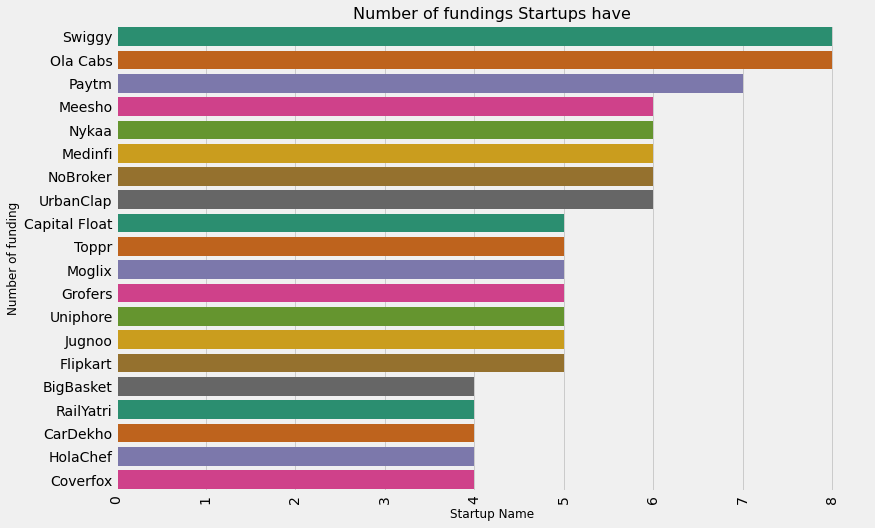

In [46]:
print('Total startup funded:', len(data['AmountInUSD'].unique())) 
print(data['StartupName'].value_counts().head(10))

startupname = data['StartupName'].value_counts().head(20) 
# lets plot the data
plt.rcParams['figure.figsize'] = (12,8)
sns.barplot(y = startupname.index, x = startupname.values, palette='Dark2') 
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of funding', fontsize=12)
plt.title('Number of fundings Startups have', fontsize=16)
plt.show()

In [41]:
# let analyze industry of startups
data['IndustryVertical'] = data['IndustryVertical'].replace('nan', 'Consumer Technology')
industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


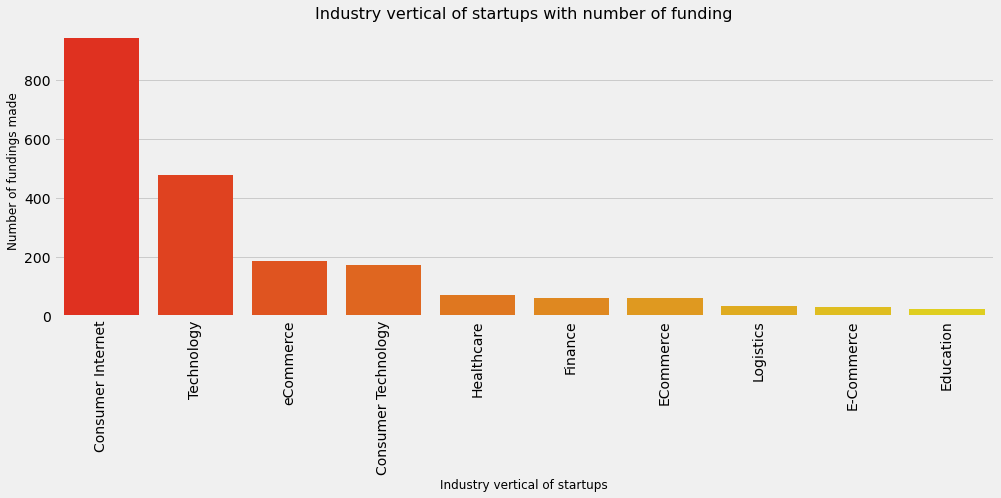

In [50]:
# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

In [52]:
# lets analyze the sub vertical industries

industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

Online Lending Platform                          11
Online Pharmacy                                  10
Food Delivery Platform                            8
Online Lending                                    5
Online lending platform                           5
Education                                         5
Online Education Platform                         5
Online Learning Platform                          5
Online Food Delivery                              4
Non-Banking Financial Company                     4
Online platform for Higher Education Services     3
Online Payment Gateway                            3
ECommerce Marketplace                             3
Online Insurance Platform                         3
Data Analytics platform                           3
Online Furniture Store                            3
SaaS                                              3
Online Marketplace                                3
B2B Marketplace                                   3
Logistics   

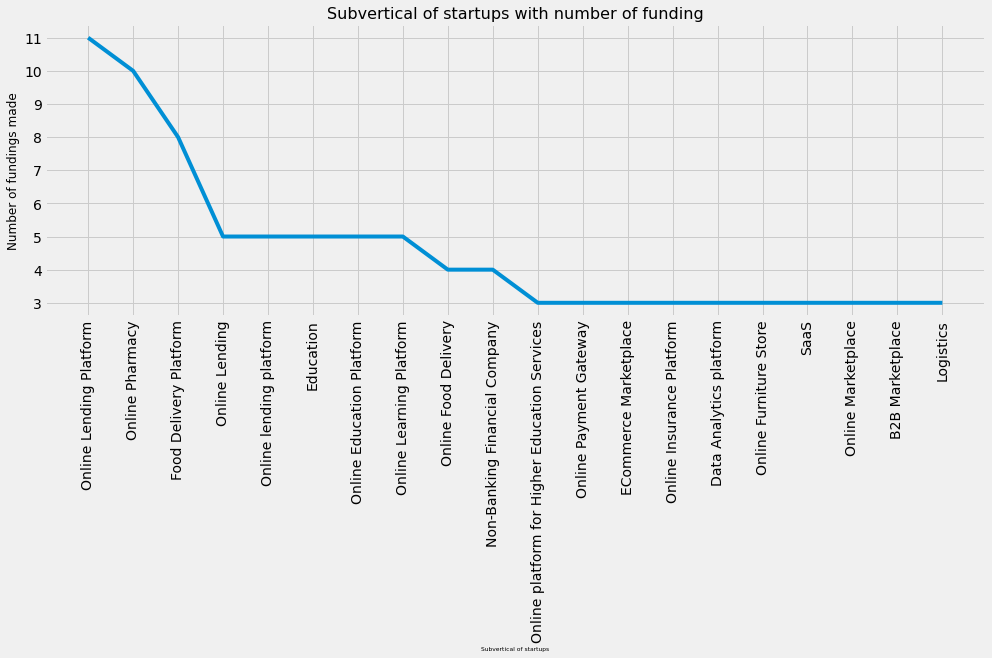

In [56]:
# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation=90)
plt.xlabel('Subvertical of startups', fontsize=6)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

In [59]:
data.columns

Index(['SNo', 'Date', 'StartupName', 'IndustryVertical', 'SubVertical', 'City',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'yearmonth', 'city'],
      dtype='object')

In [60]:
# Does location play any role in detemining the growth of startup?
# analyzing the effect of cities on a startup

data['City'] = data['City'].replace(('Bengaluru', 'nan'),('Bangalore','Bangalore')) 
city = data['City'].value_counts().head(10)
print(city)

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


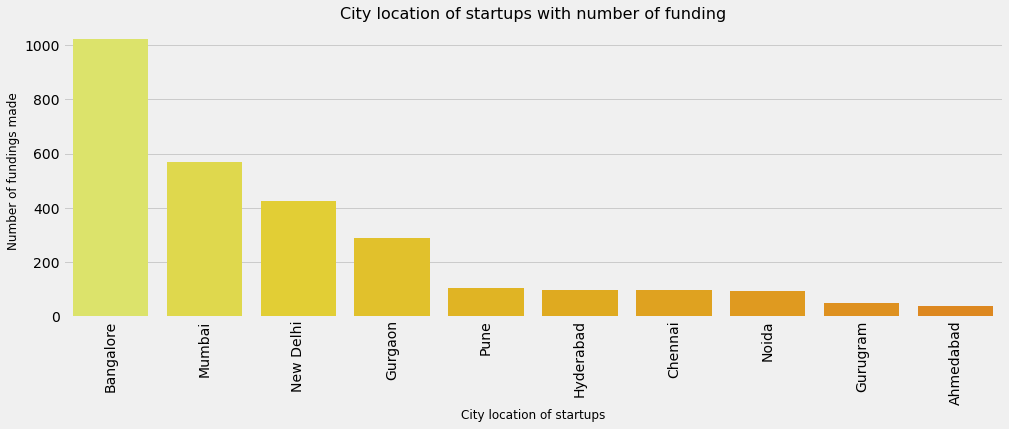

In [61]:
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('City location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("City location of startups with number of funding", fontsize=16)
plt.show()

In [62]:
from wordcloud import WordCloud

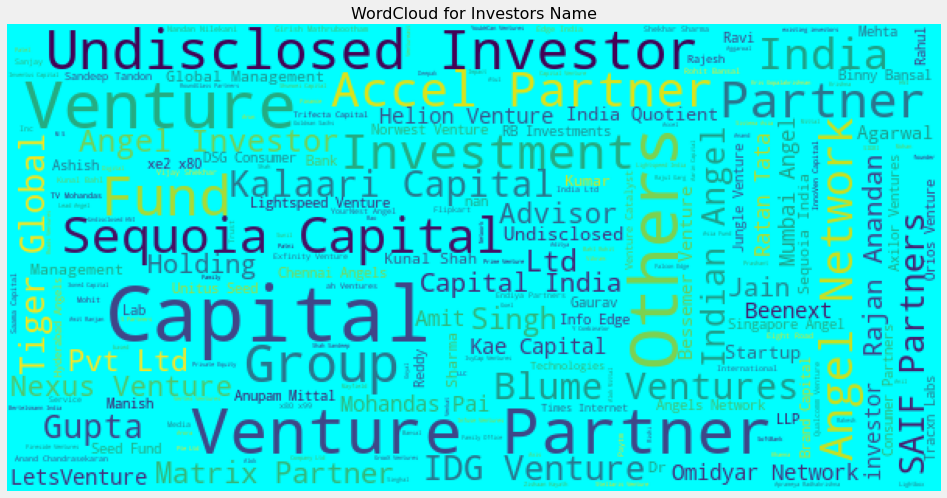

In [63]:
names = data['InvestorsName'][~pd.isnull(data['InvestorsName'])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color='cyan').generate(' '.join(names))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.title("WordCloud for Investors Name", fontsize=16)
plt.axis('off')
plt.show()

In [64]:
# lets clean the dataset
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

investors = data['InvestorsName'].value_counts().head(10)
print(investors)

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
RoundGlass Partners          10
Name: InvestorsName, dtype: int64


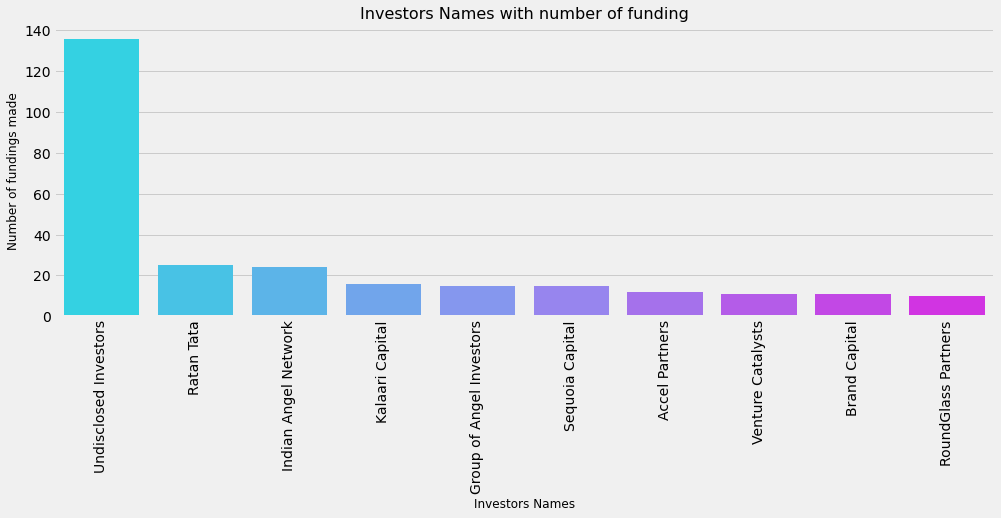

In [65]:
# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

In [67]:
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


In [68]:
data['InvestmentType'][data['InvestmentType'] == 'SeedFundiing'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

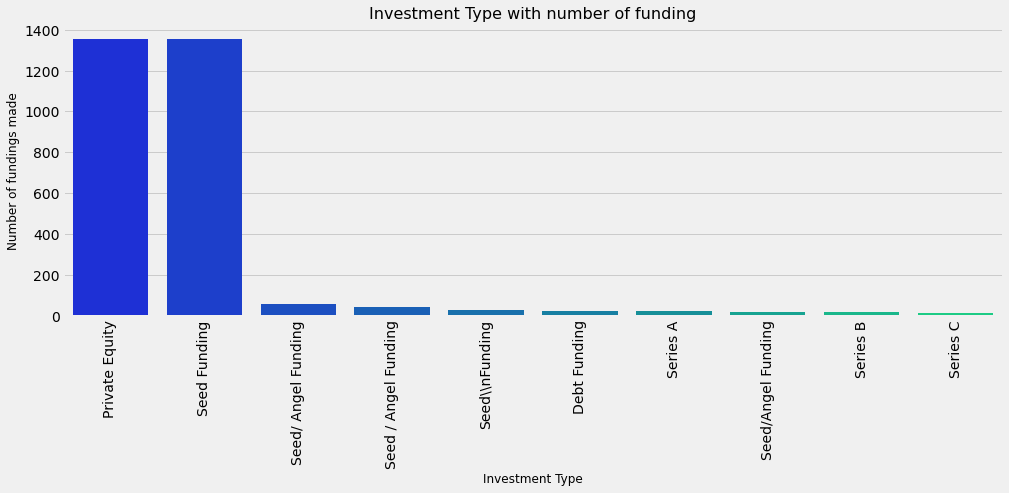

In [69]:
sns.barplot(investment.index, investment.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()